# The Import Statements

In [112]:
from collections import Counter
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
%matplotlib inline


# loading the dataset

In [113]:
digits = load_digits()


#### for the sake of simplicity the targets will be at the last index of the rows

In [114]:
digits_and_targets = np.insert(digits.data, 64, values=digits.target, axis=1)

## splitting the data to a training set and a test set

In [115]:
test, training = train_test_split(digits_and_targets, train_size=.20, random_state=42)


## An image from the training set

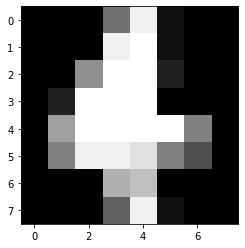

digit: 4.0


In [116]:
randint = random.randint(0,10)

plt.gray()
plt.imshow(np.array(test[randint, :64]).reshape((8, 8)))
plt.show()
print("digit:", test[randint][-1])

In [117]:
def should_split(data):
    return len(np.unique(data[:,-1])) > 1

In [118]:
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.class_decision = None


In [119]:
def decide_class(data_and_targets):
    return data_and_targets[:,-1][0]

def fit_tree(data_and_targets, node=Node(), feature_index=0):

    if (len(data_and_targets) > 0 and feature_index == len(data_and_targets[0]) - 1) or not should_split(data_and_targets):
        node.class_decision = decide_class(data_and_targets)
    elif should_split(data_and_targets):
        left_slice = data_and_targets[data_and_targets[:,feature_index]<8]
        right_slice = data_and_targets[data_and_targets[:,feature_index]>=8]

        feature_index+=1

        if len(left_slice):
            node.left = Node()
            fit_tree(left_slice, node.left, feature_index)

        if len(right_slice):
            node.right = Node()
            fit_tree(right_slice, node.right, feature_index)

    return node

# Planting the trees of the forest 😊


In [120]:

def create_the_forest(trees_number = 500, sample_size = 500):
    the_forest = []

    for _ in range(trees_number):
        random_indices = np.random.choice(training.shape[0], size=sample_size, replace=False)
        new_tree = fit_tree(training[random_indices])
        the_forest.append(new_tree)

    return the_forest

In [ ]:
forest_with_small_samples = create_the_forest(trees_number=100, sample_size=500)

forest_with_large_samples = create_the_forest(trees_number=100, sample_size=1000)


In [121]:
def predict_class(tree_root_node: Node, data, index=0):
    if index == len(data) - 1:
        return tree_root_node.class_decision

    if data[index] < 8:
        if tree_root_node.left is not None:
            return predict_class(tree_root_node.left, data, index+1)

    if data[index] >= 8:
        if tree_root_node.right is not None:
            return predict_class(tree_root_node.right, data, index+1)

    return tree_root_node.class_decision

def get_votes(forest, image):
    votes = []
    for tree in forest:
        votes.append(predict_class(tree, image))

    return votes

def predict_number(forest, image):
    votes = get_votes(forest,image)

    most_common = Counter(votes).most_common(1)[0][0]

    return most_common

In [122]:
count = 0

for image in test:
    if predict_number(the_forest, image) == image[-1]:
        count += 1

print(count/test.shape[0])

0.4958217270194986
